In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [16]:
gdrive_download("1-53SYpNxvtAaVDcn8FrWUhX5RJCaI_Fr", "images.zip")

0

In [17]:
%%writefile kruzhok.yaml
train: images_train
val: images_test

nc: 1
names: ['kruzhok']

Overwriting kruzhok.yaml


In [23]:
!python train.py --img 640 --batch 16 --epochs 10 --data kruzhok.yaml --cfg yolov5s.yaml --weights runs/exp1/weights/best.pt --nosave --cache

Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='kruzhok.yaml', device='', epochs=10, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='runs/exp1/weights/best.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-10-05 20:48:03.630861: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'giou': 0.05, 'cls': 0.5, 'cls_pw':

In [21]:
!python detect.py --weights runs/exp1/weights/best.pt --img 640 --conf 0.4 --source ../valid

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='../valid', update=False, view_img=False, weights=['runs/exp1/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... 
Model Summary: 191 layers, 7.25509e+06 parameters, 0 gradients
image 1/1 /content/valid/test.jpg: 448x640 2 kruzhoks, Done. (0.012s)
Results saved to inference/output
Done. (0.070s)


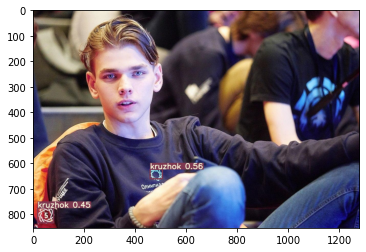

In [22]:
import os
from PIL import Image as PImage
import matplotlib.pyplot as plt

for img_path in os.listdir("inference/output"):
  with PImage.open("inference/output/" + img_path) as img:
    plt.imshow(img)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!cp runs/exp2/weights/last.pt /gdrive/My\ Drive/

Mounted at /gdrive
